In [2]:
import data_analysis_tools as da
def predict(alpha, beta, xi):
    return beta * xi + alpha

def error(alpha, beta, xi, yi):
    return yi - predict(alpha, beta, xi)

def sum_of_squared_errors(alpha, beta, x, y):
    errors = [error(alpha, beta, xi, yi) for xi, yi in zip(x, y)]
    return da.sum_of_squares(errors)


def least_squares_fit(x, y):
    beta = da.correlation(x, y) * da.standard_deviation(y) / da.standard_deviation(x)
    alpha = da.mean(y) - beta * da.mean(x)
    return alpha, beta


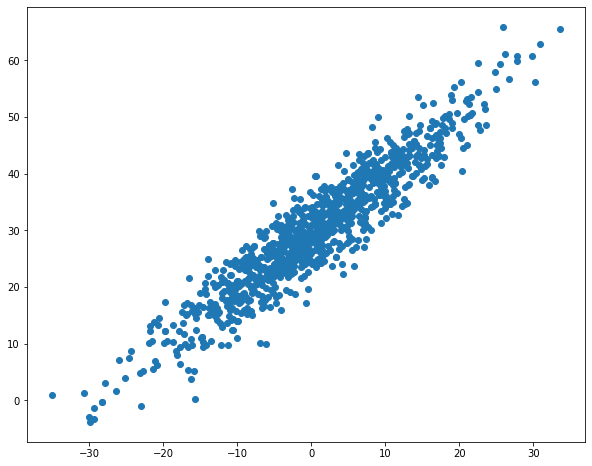

In [3]:
import matplotlib.pyplot as plt
xs = da.random.normal(0, 10, 1000)
ys = [int(da.random.normal(30, 4, 1)) + xi for xi in xs]


plt.figure(figsize=(10, 8))
plt.scatter(xs, ys)
plt.show()

In [4]:
alpha, beta = least_squares_fit(xs, ys)

print(f' alpha: {alpha}, beta: {beta} ')

 alpha: 29.49698507987681, beta: 0.9938589731131046 


In [5]:
predict(alpha, beta, 100)

128.88288239118728

In [6]:
def total_sum_of_squares(y):
    return sum(v ** 2 for v in da.de_mean(y))

def r_squared(alpha, beta, x, y):
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) / total_sum_of_squares(y))

r_squared(alpha, beta, xs, ys)

0.8802831919184474

In [7]:
# using the gradient descent
def squared_error(xi, yi, theta):
    alpha, beta = theta
    return error(alpha, beta, xi, yi) ** 2
    
def squared_error_gradient(xi, yi, theta):
    alpha, beta = theta
    return [-2 * error(alpha, beta, xi, yi), -2 * error(alpha, beta, xi, yi) * xi]

da.r.seed(0)
theta = [da.random.random(), da.random.random()]

alpha, beta = da.minimize_stochastic(
    squared_error,
    squared_error_gradient,
    xs,
    ys,
    theta,
    0.0001
)

print(alpha, beta)

29.497272509374454 0.9939110231015287


In [8]:
# multiple regression
from collections import defaultdict

data = da.file_ops.read_csv('./files/hss.csv')
data

keys = ["Radio", "Social Media", "Influencer", "Sales"]
data = [(0.0 if data_i["Radio"] == "" else float(data_i["Radio"]), 
    0.0 if data_i["Social Media"] == "" else float(data_i["Social Media"]), 
    0 if data_i["Influencer"] == "Mega" else 1 if data_i["Influencer"] == "Micro" else 2 if data_i["Influencer"] == "Nano" else 3,
    0.0 if data_i["Sales"] == "" else float(data_i["Sales"])) 
    for data_i in data]

train, test = da.random.split_data(data, 0.2)

train[:5]

array([[  7.68703554,   2.08046132,   2.        ,  55.15072263],
       [  9.96078391,   0.56344439,   0.        , 255.8479365 ],
       [ 11.75733151,   3.73375435,   2.        ,  70.20770114],
       [ 24.60359711,   4.14617113,   2.        , 342.9582007 ],
       [ 10.55719558,   7.34543751,   1.        , 159.798753  ]])

In [9]:
train_features = [(train_i[0], train_i[1], train_i[2]) for train_i in train]
train_labels = [train_i[3] for train_i in train]

test_features = [(test_i[0], test_i[1], test_i[2]) for test_i in test]
test_labels = [test_i[3] for test_i in test]

print(train_features[:5])
print(train_labels[:5])

[(7.687035542, 2.080461325, 2.0), (9.960783911, 0.563444389, 0.0), (11.75733151, 3.733754349, 2.0), (24.60359711, 4.14617113, 2.0), (10.55719558, 7.345437512, 1.0)]
[55.15072263, 255.8479365, 70.20770114, 342.9582007, 159.798753]


In [10]:
train_data = []

for j in range(len(train[0])):
    col = []
    for i in range(len(train)):
        col.append(train[i][j])
    train_data.append(col)

In [11]:
def predict(xi, beta):
    return da.dot_product(xi, beta)

def error(xi, yi, beta):
    return yi - predict(xi, beta)

def squared_error(xi, yi, beta):
    return error(xi, yi, beta) ** 2

def squared_error_gradient(xi, yi, beta):
    return [-2 * xij * error(xi, yi, beta) for xij in xi]

def estimate_beta(x, y):
    beta_initial = [da.random.random() for xi in x[0]]
    return da.minimize_stochastic(squared_error,
        squared_error_gradient,
        x, y,
        beta_initial,
        0.001
    )

da.r.seed(0)
beta = estimate_beta(train_features, train_labels)
beta

[9.221252828482719, 2.080534188281604, 8.145775736682575]

In [12]:
print(beta)

[9.221252828482719, 2.080534188281604, 8.145775736682575]


In [13]:
test_index = 3
predicted = predict(test_features[test_index], beta)
actual = test_labels[test_index]

print(f' predicted: {predicted}, actual: {actual} ')

 predicted: 353.7410949667439, actual: 351.1142035 


In [14]:
for test_index in range(20):
    predicted = predict(test_features[test_index], beta)
    actual = test_labels[test_index]

    print(f' predicted: {predicted}, actual: {actual} ')

 predicted: 200.2144292260346, actual: 224.7741278 
 predicted: 111.20501195605348, actual: 71.12471063 
 predicted: 190.71985550364533, actual: 130.9960832 
 predicted: 353.7410949667439, actual: 351.1142035 
 predicted: 179.14182300445708, actual: 225.7454019 
 predicted: 201.93605105713522, actual: 230.4452322 
 predicted: 98.87143029208679, actual: 119.4005846 
 predicted: 89.38360747962857, actual: 54.88491943 
 predicted: 261.30639827423914, actual: 244.2670557 
 predicted: 252.2009837842984, actual: 185.7341703 
 predicted: 121.23976556444141, actual: 202.3643006 
 predicted: 107.21581450324564, actual: 225.0640548 
 predicted: 218.1331905895801, actual: 226.0179062 
 predicted: 53.2585774985924, actual: 72.62590273 
 predicted: 35.545213042545754, actual: 49.15396788 
 predicted: 72.24900789168181, actual: 49.60035259 
 predicted: 160.58018374079407, actual: 159.5372458 
 predicted: 90.96933836463538, actual: 56.67415544 
 predicted: 38.44137984443728, actual: 83.40241283 
 pre

In [15]:
def test_model(test_features, test_labels, allowed_error=0.25):
    """if actual + actual * (allowed_error / 2) > predicted > actual - actual * (allowed_error / 2): 
        correct += 1\n
        returns correct / total"""
    correct = 0
    total = len(test_labels)
    for feature, label in zip(test_features, test_labels):
        predicted = predict(feature, beta)
        actual = label

        
        if actual + actual * (allowed_error / 2) > predicted > actual - actual * (allowed_error / 2):
            correct += 1
        

    return correct / total

test_model(test_features, test_labels, allowed_error=0.4)

0.5453551912568306

In [16]:
def multiple_r_squared(x, y, beta):
    sum_of_sq_errs = sum(error(xi, yi, beta) ** 2 for xi, yi in zip(x, y))
    return 1 - sum_of_sq_errs / total_sum_of_squares(y)

multiple_r_squared(test_features, test_labels, beta)

0.7086263016131149

In [17]:
def multiple_r_squared(x, y, beta):
    sum_of_sq_errs = sum(error(xi, yi, beta) ** 2 for xi, yi in zip(x, y))
    return 1 - sum_of_sq_errs / total_sum_of_squares(y)

print('on train data:', multiple_r_squared(train_features, train_labels, beta))
print('on test data:', multiple_r_squared(test_features, test_labels, beta))

on train data: 0.7215984225523497
on test data: 0.7086263016131149


In [92]:
# digression, the bootstrap
def bootstrap_sample(xs, ys=None):
    if ys:
        length = len(ys)
        sample_index = da.random.rand_index(length)
        return xs[sample_index], ys[sample_index]
    else:
        return da.random.sample(xs)

        
def bootstrap_statistic(data, stats_fn, num_samples):
    try:
        xs, ys = zip(*data)
        samples = [bootstrap_sample(xs, ys) for _ in range(num_samples)]
    except:
        samples = [bootstrap_sample(data) for _ in range(num_samples)]
    print(samples)

    return stats_fn(samples)

print('mean:', da.median(xs))
print('bootstrap mean:', bootstrap_statistic(xs, da.median, 10))

mean: 0.426203419499148
[19.286010808537686, -5.91365139511267, 10.297789650397691, -2.3432769223399954, 10.015366557845581, 12.25832275582867, 6.901192151286644, -4.745935357429174, -2.0572520836845563, 16.022850388822405]
bootstrap mean: 8.458279354566113


In [94]:
def estimate_sample_beta(sample):
    x_sample, y_sample = list(zip(*sample))
    return estimate_beta(x_sample, y_sample)


bootstrap_betas = bootstrap_statistic(zip(train_features, train_labels), estimate_sample_beta, 10)
bootstrap_betas


[((10.55719558, 7.345437512, 1.0), 159.798753), ((10.43493748, 3.021098715, 1.0), 39.05670605), ((15.73860438, 4.224996581, 0.0), 190.6822352), ((31.73905151, 6.53042334, 3.0), 353.251334), ((30.92426092, 4.636847457, 0.0), 304.5374673), ((14.05805349, 1.497131726, 3.0), 195.7694205), ((21.06609239, 1.367707729, 0.0), 199.4783271), ((14.12523976, 0.417048422, 0.0), 95.88047198), ((28.75170232, 6.739499589, 0.0), 244.9267479), ((17.48860583, 2.950997206, 2.0), 268.9224504)]


[8.698621848072037, 3.638324359856581, 23.07865175113757]